# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 11</span>

## 11.2

Nel secondo esercizio si richiede il fit di una funzione di terzo grado: $f(x)=4-3x-2x^2+3x^3$ con $x \in [-1,1]$. Ho variato i parametri facendo vari modelli per poter vedere come cambiasse il fit. Per tutti i modelli ho mantenuto lo stesso numero di epoche $N_{epoch}$ ($100$), la stessa dimensione del dataset di *train* ($2000$) e di *validation* ($200$) e anche lo stesso *optimizer*. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

Nel primo modello che presento ho usato diversi *layer* con funzioni di attivazione differenti e con circa una decina di neuroni ciascuno. Fra i vari tentativi con molti *layer* che ho effettuato questo è quello che ha dato un fit più accurato. Tra i modelli che ho provato, alcuni erano simili a questo con invertito l'ordine delle funzioni di attivazione e i risultati che ottenevo erano molto differenti. Ho quindi pensato che è importante con quale ordine si impostano tali funzioni per il fit che si intende effettuare.

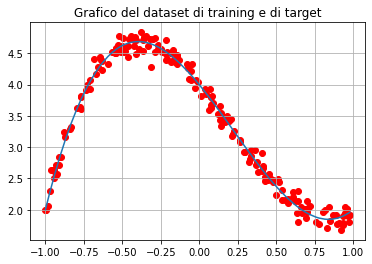


Modello valutato con il set di validation
Test loss: 0.01141713373363018
Test accuracy: 0.01141713373363018

Modello valutato con la curva esatta
Test loss: 0.0008087273454293609
Test accuracy: 0.0008087273454293609


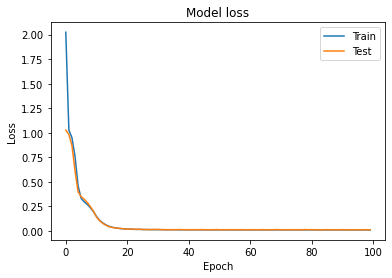

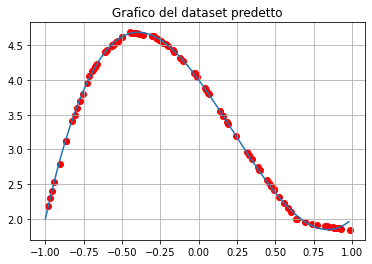

In [0]:
# target parameters of f(x) = a + b*x + c*x^2 +d*x^3
a = 4
b = -3
c = -2
d = 3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a + b*x_valid + c*x_valid**2 +d*x_valid**3
 
sigma = 0.1
y_train = np.random.normal(a + b*x_train + c*x_train**2 +d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 +d*x_valid**3, sigma)

# plot training and target dataset
plt.title('Grafico del dataset di training e di target')
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

model = Sequential()
model.add(Dense(15, input_shape=(1,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print()
print('Modello valutato con il set di validation')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Modello valutato con la curva esatta')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Grafico del dataset predetto')
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Nei modelli che seguono ho utilizzano un solo *layer* contenente molti neuroni. Ho scritto circa una quarantina di neuroni, che corrispondono al numero totale di quelli distribuiti nei *layer* differenti del modello che ho precedentemente analizzato. Ho osservato che questo non è equivalente al risultato di sopra, anzi il fit è peggiorato e quindi aumentare così tanto in un solo *layer* il numero di neuroni non può essere la soluzione per effettuare un buon fit. Ho poi voluto testare le diverse funzioni di attivazione e così mantenendo un *layer* di $40$ neuroni ho cambiato solo tale funzione per verificare se il fit migliorasse. Nel primo modello ho usato la funzione *relu*, nel secondo ho usato *softplus* e nel terzo ho utilizzato *tanh*. La *loss* è minimizzata di più per la funzione *tanh* e ho trovato la funzione *softplus* decisamente poco efficiente nel riuscire a fittare la funzione data.

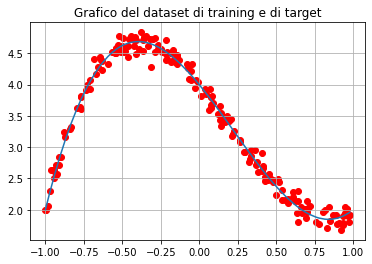


Modello valutato con il set di validation
Test loss: 0.030167624354362488
Test accuracy: 0.030167624354362488

Modello valutato con la curva esatta
Test loss: 0.02246979996562004
Test accuracy: 0.02246979996562004


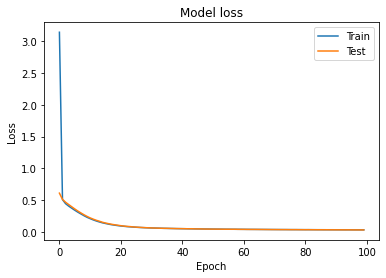

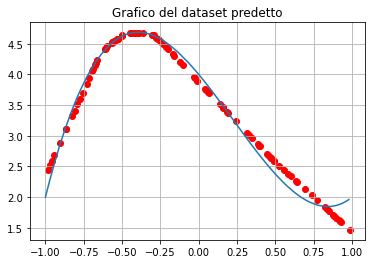

In [0]:
# target parameters of f(x) = a + b*x + c*x^2 +d*x^3
a = 4
b = -3
c = -2
d = 3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a + b*x_valid + c*x_valid**2 +d*x_valid**3
 
sigma = 0.1
y_train = np.random.normal(a + b*x_train + c*x_train**2 +d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 +d*x_valid**3, sigma)

# plot training and target dataset
plt.title('Grafico del dataset di training e di target')
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

model = Sequential()
model.add(Dense(40, input_shape=(1,), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print()
print('Modello valutato con il set di validation')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Modello valutato con la curva esatta')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Grafico del dataset predetto')
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

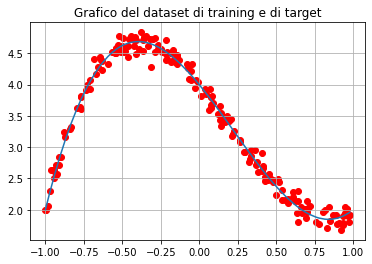


Modello valutato con il set di validation
Test loss: 0.24020572006702423
Test accuracy: 0.24020572006702423

Modello valutato con la curva esatta
Test loss: 0.23762165009975433
Test accuracy: 0.23762165009975433


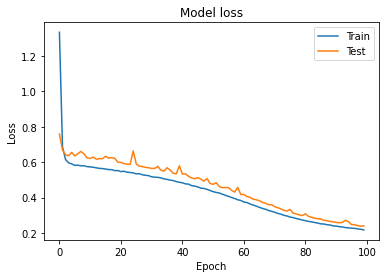

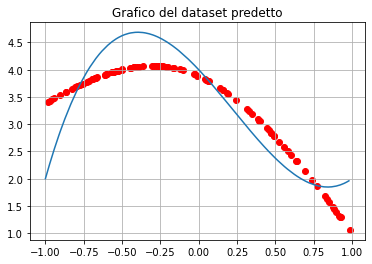

In [0]:
# target parameters of f(x) = a + b*x + c*x^2 +d*x^3
a = 4
b = -3
c = -2
d = 3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a + b*x_valid + c*x_valid**2 +d*x_valid**3
 
sigma = 0.1
y_train = np.random.normal(a + b*x_train + c*x_train**2 +d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 +d*x_valid**3, sigma)

# plot training and target dataset
plt.title('Grafico del dataset di training e di target')
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

model = Sequential()
model.add(Dense(40, input_shape=(1,), activation='softplus'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print()
print('Modello valutato con il set di validation')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Modello valutato con la curva esatta')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Grafico del dataset predetto')
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

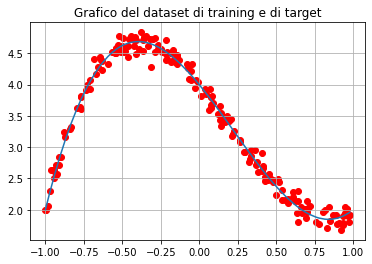


Modello valutato con il set di validation
Test loss: 0.02924296446144581
Test accuracy: 0.02924296446144581

Modello valutato con la curva esatta
Test loss: 0.020668525248765945
Test accuracy: 0.020668525248765945


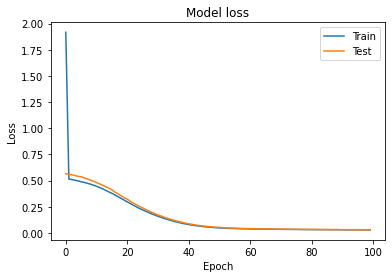

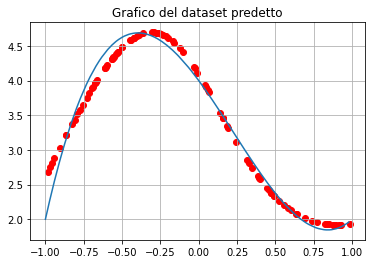

In [0]:
# target parameters of f(x) = a + b*x + c*x^2 +d*x^3
a = 4
b = -3
c = -2
d = 3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a + b*x_valid + c*x_valid**2 +d*x_valid**3
 
sigma = 0.1
y_train = np.random.normal(a + b*x_train + c*x_train**2 +d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 +d*x_valid**3, sigma)

# plot training and target dataset
plt.title('Grafico del dataset di training e di target')
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

model = Sequential()
model.add(Dense(40, input_shape=(1,), activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print()
print('Modello valutato con il set di validation')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Modello valutato con la curva esatta')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Grafico del dataset predetto')
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()